In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
data=pd.read_csv("advertising.csv")

In [ ]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
data.shape

(200, 4)

In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

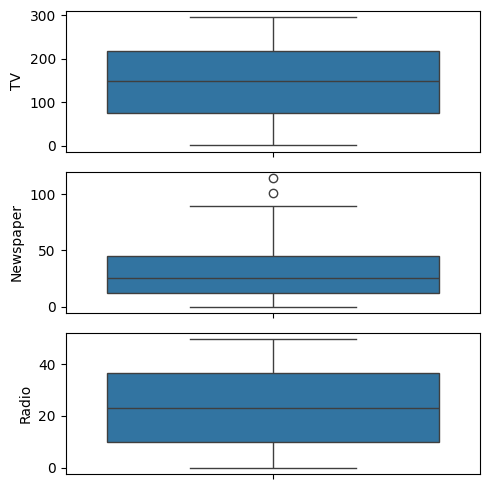

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


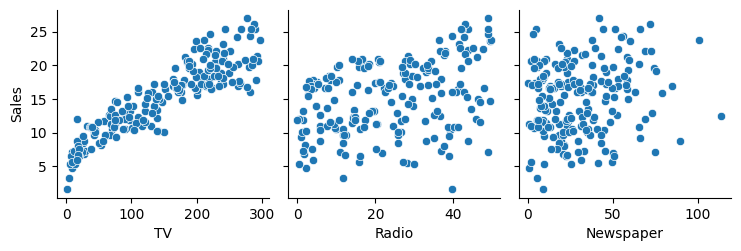

In [ ]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

###when advertising cost increases in TV ads the sales will increase as well,but newspaper and radio are unpredictable

<Axes: ylabel='Frequency'>

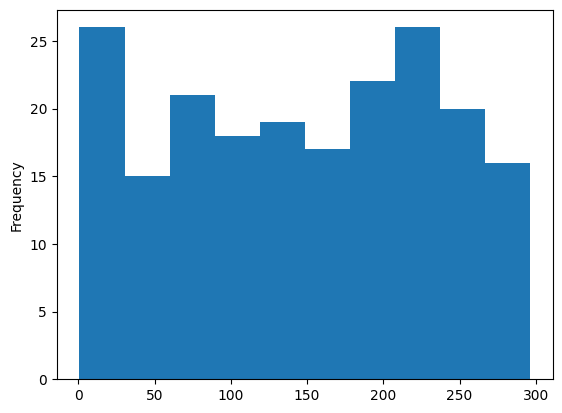

In [ ]:
data['TV'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

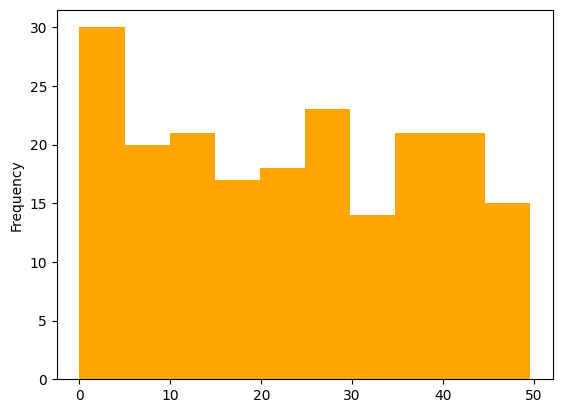

In [ ]:
data['Radio'].plot.hist(bins=10,color='orange',xlabel='Radio')

<Axes: ylabel='Frequency'>

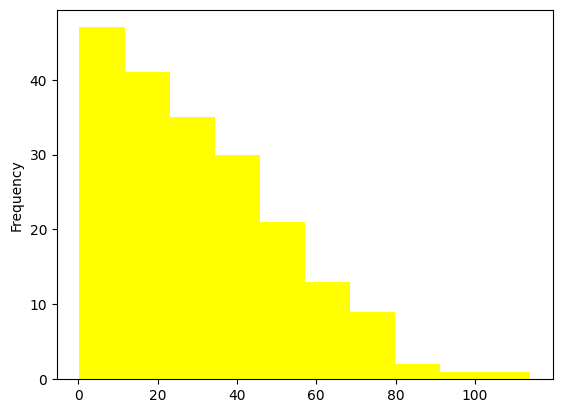

In [ ]:
data['Newspaper'].plot.hist(bins=10,color='yellow',xlabel='Newspapeer')

The majority sales is the result of low advertising cost in the newspaper

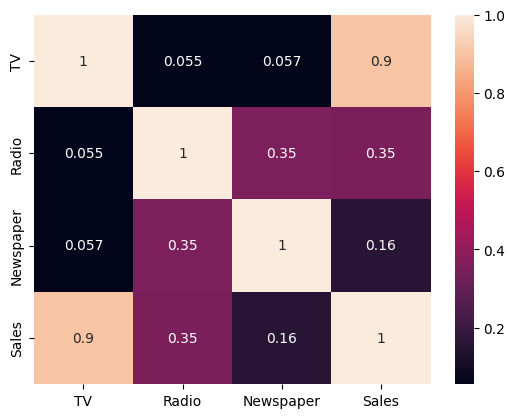

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()

sales is highly corelated with the TV

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['TV']],data[['Sales']],test_size=0.4,random_state=0)

In [ ]:
print(X_train)

        TV
187  191.1
46    89.7
138   43.0
195   38.2
108   13.1
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[120 rows x 1 columns]


In [ ]:
print(y_train)

     Sales
187   17.3
46    10.6
138    9.6
195    7.6
108    5.3
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[120 rows x 1 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
m=LinearRegression()
m.fit(X_train,y_train)

LinearRegression()

In [ ]:
abc=m.predict(X_test)
print(abc)

[[10.87270287]
 [ 9.80413715]
 [12.05257753]
 [23.14451236]
 [16.49380382]
 [10.14919483]
 [ 7.50560775]
 [20.38405091]
 [ 8.34599017]
 [18.01873615]
 [21.56392556]
 [11.87448324]
 [15.7369031 ]
 [17.4733224 ]
 [11.27341502]
 [13.71108058]
 [21.80323976]
 [ 7.06037204]
 [11.17880243]
 [18.8980767 ]
 [23.02763798]
 [14.82973532]
 [16.7665107 ]
 [14.35110692]
 [ 9.99892778]
 [13.87247853]
 [16.23779328]
 [18.43057919]
 [19.48801402]
 [ 8.41834098]
 [10.79478662]
 [18.09108696]
 [22.64362218]
 [20.47309805]
 [ 7.75605285]
 [ 8.0621524 ]
 [10.33842001]
 [17.08374114]
 [10.8281793 ]
 [ 8.41277553]
 [ 9.07506366]
 [ 8.77452955]
 [14.97443693]
 [18.68658973]
 [19.00938563]
 [12.73712744]
 [ 7.50004231]
 [ 7.96197436]
 [14.01718013]
 [12.84287093]
 [13.13227414]
 [19.79411358]
 [21.14651707]
 [17.31192445]
 [ 9.50916849]
 [10.48868707]
 [23.32260665]
 [16.62180909]
 [18.29144303]
 [ 7.4276915 ]
 [21.78097797]
 [18.01873615]
 [19.18191447]
 [15.21931657]
 [16.55502373]
 [19.1373909 ]
 [21.64184

In [ ]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
..     ...
89    16.7
109   19.8
14    19.0
27    20.9
141   19.2

[80 rows x 1 columns]


In [ ]:
m.intercept_

array([7.02141391])

In [ ]:
m.coef_

array([[0.05565446]])

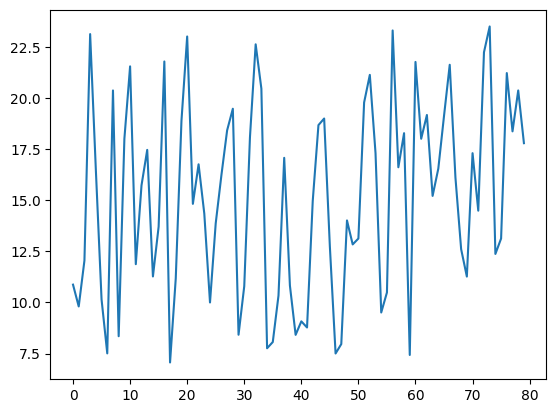

In [ ]:
plt.plot(abc)

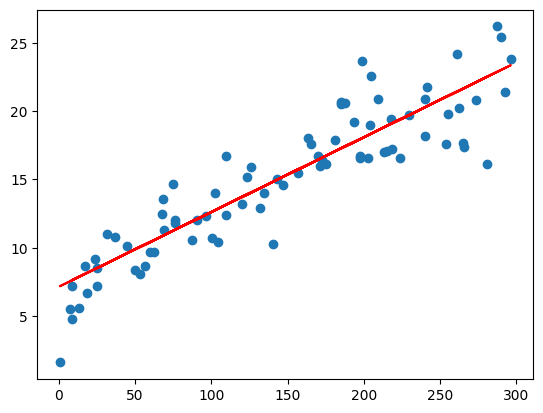

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,7.14382225+0.05473199 * X_test,'r')
plt.show()